In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from os import path
from glob import glob
import sys
sys.path.insert(0, path.abspath('./'))

from src import workdir, parse_model_parameter_file
from src.emulator_BAND import EmulatorBAND

In [2]:
model_par = "../data/modelDesign_3DMCGlauber.txt"
training_set = "../data/AuAu7.7_dNdy.pkl"

In [3]:
emu1 = EmulatorBAND(training_set, model_par, method='PCGP')
emu2 = EmulatorBAND(training_set, model_par, method='PCSK')

[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator_BAND] Training dataset size: 1000
[INFO][emulator_BAND] All training data are loaded.
[INFO][emulator_BAND] loading training data from ../data/AuAu7.7_dNdy.pkl ...
[INFO][emulator_BAND] Training dataset size: 1000
[INFO][emulator_BAND] All training data are loaded.


In [4]:
output_emu1 = emu1.testEmulatorErrors(number_test_points=600, number_iterations=1)

emu_pred_1 = output_emu1[0]
emu_pred_err_1 = output_emu1[1]
vali_data_1 = output_emu1[2]
vali_data_err_1 = output_emu1[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 400 training points ...


In [5]:
output_emu2 = emu2.testEmulatorErrors(number_test_points=600, number_iterations=1)

emu_pred_2 = output_emu2[0]
emu_pred_err_2 = output_emu2[1]
vali_data_2 = output_emu2[2]
vali_data_err_2 = output_emu2[3]

[INFO][emulator_BAND] Validation GP emulators iter = 0 ...
[INFO][emulator_BAND] Performing emulator training ...
[INFO][emulator_BAND] Train GP emulators with 400 training points ...


In [6]:
def plot_emulator_vs_truth(vali_data,vali_data_err,emu_pred,emu_pred_err):
    nValidationPoints, nObs = vali_data_1.shape

    for obsIdx in range(nObs):
        fig = plt.figure()
        ax = plt.axes([0.12, 0.12, 0.83, 0.83])
        plt.errorbar(vali_data[:, obsIdx], emu_pred[:, obsIdx],
                    yerr=np.sqrt(emu_pred_err[:, obsIdx,obsIdx]),
                    xerr=vali_data_err[:, obsIdx],
                    marker="o", linestyle="")
        plt.plot([-200, 200], [-200, 200], '--k')
        plt.xlim([vali_data[:, obsIdx].min() - 1,
                vali_data[:, obsIdx].max() + 1])
        plt.ylim([emu_pred[:, obsIdx].min() - 1,
                emu_pred[:, obsIdx].max() + 1])
        ax.set_aspect('equal')
        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        plt.xlabel("truth")
        plt.ylabel("emulator results")

def plot_emulator_vs_truth_relative(vali_data,vali_data_err,emu_pred,emu_pred_err):
    nValidationPoints, nObs = vali_data.shape

    for obsIdx in range(nObs):
        fig = plt.figure()
        ax = plt.axes([0.12, 0.12, 0.83, 0.83])
        plt.plot(range(len(vali_data)),
                (emu_pred[:, obsIdx] - vali_data[:, obsIdx])/np.sqrt(vali_data_err[:, obsIdx]**2.+ emu_pred_err[:, obsIdx, obsIdx]),
                marker="o", linestyle="")
        plt.fill_between([-nValidationPoints, nValidationPoints], [2, 2], [-2, -2], color='g', alpha=0.2)
        plt.xlim([-1,len(vali_data)+1])
        plt.ylim([-4, 4])
        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        plt.xlabel("test point")
        plt.ylabel("relative diff. [$\sigma$]")

def plot_histogram_emulator_vs_truth_relative(vali_data_list,emu_pred_list,emu_pred_err_list,dataset_labels=None):
    if not isinstance(vali_data_list, list):
        vali_data_list = [vali_data_list]
    if not isinstance(emu_pred_list, list):
        emu_pred_list = [emu_pred_list]
    if not isinstance(emu_pred_err_list, list):
        emu_pred_err_list = [emu_pred_err_list]
    if not isinstance(dataset_labels, list):
        dataset_labels = [dataset_labels]
    
    nObs = vali_data_list[0].shape[1]  # Assuming all datasets have the same number of observables

    for obsIdx in range(nObs):
        fig, ax = plt.subplots()
        ax.set_xlabel("A = (GP-truth)/GPerr")
        ax.set_ylabel("p(A)")
        
        for vali_data, emu_pred, emu_pred_err, label in zip(vali_data_list, emu_pred_list, emu_pred_err_list, dataset_labels):
            ax.hist((emu_pred[:, obsIdx] - vali_data[:, obsIdx]) / np.sqrt(emu_pred_err[:, obsIdx, obsIdx]), 
                    bins=25, density=True, histtype='step', label=label)

        ax.text(0.05, 0.95, "obs {}".format(obsIdx), fontsize=20, transform=ax.transAxes, verticalalignment='top')
        ax.legend()
        plt.show()

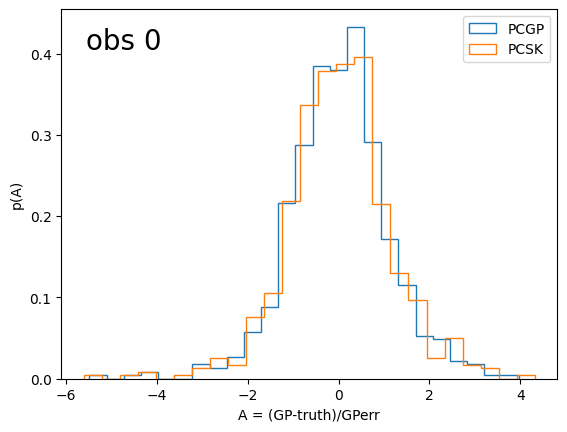

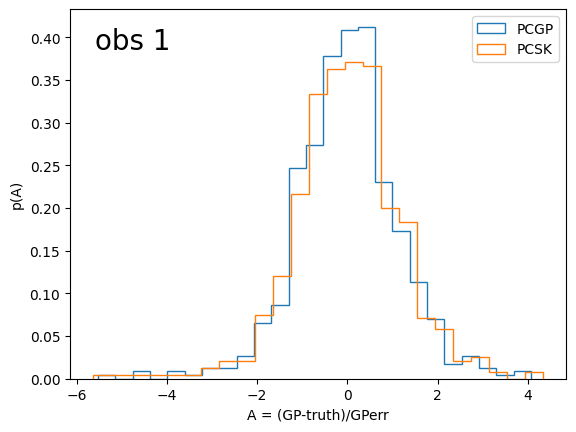

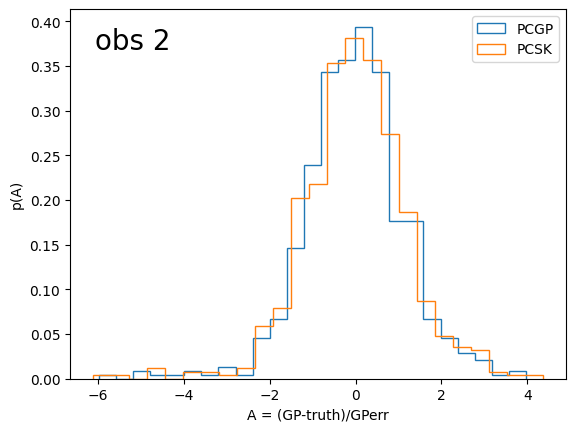

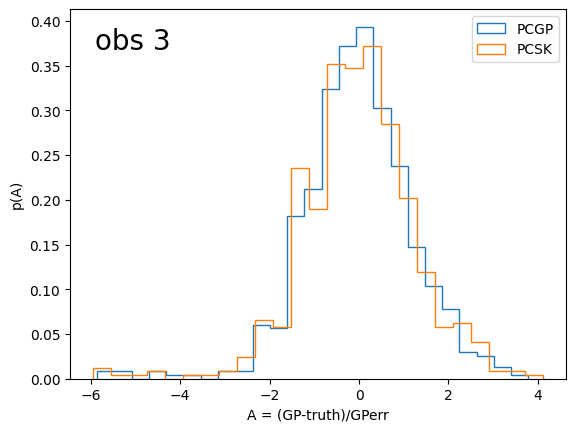

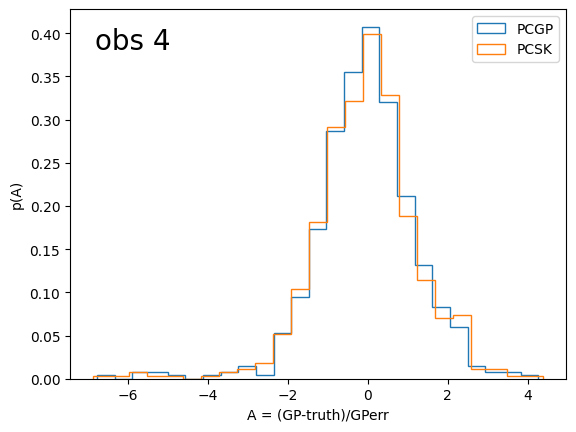

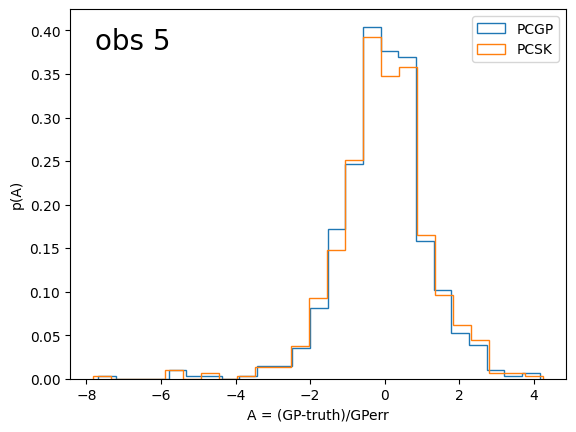

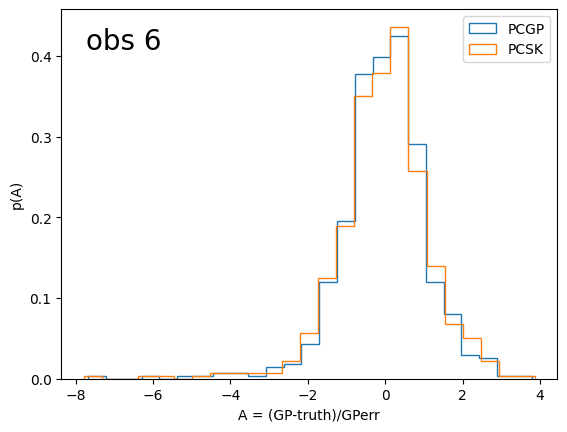

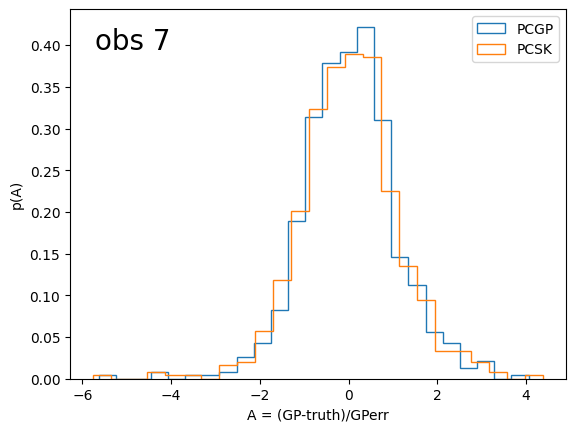

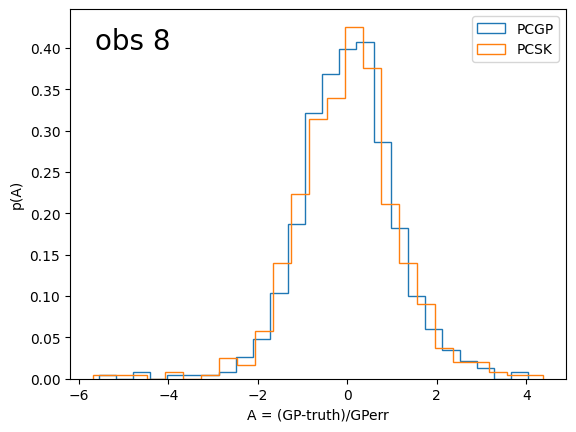

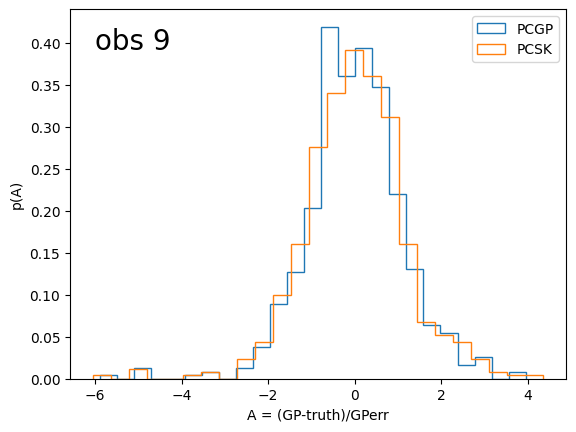

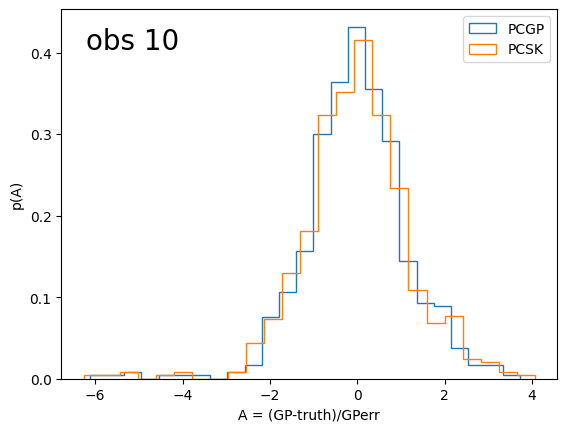

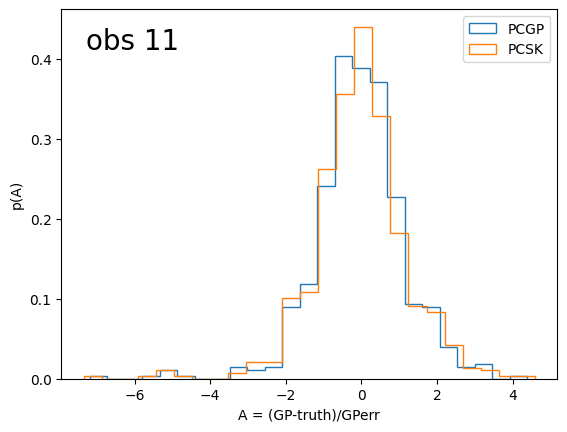

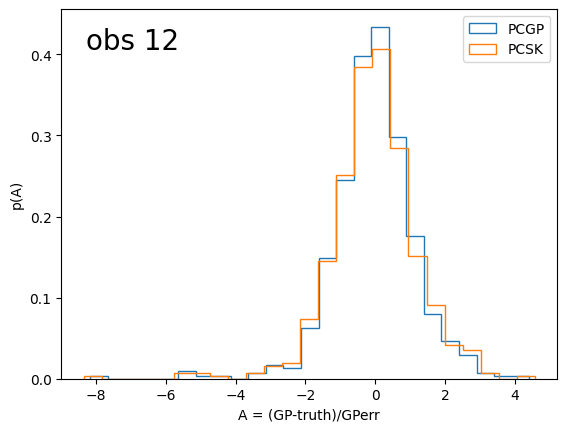

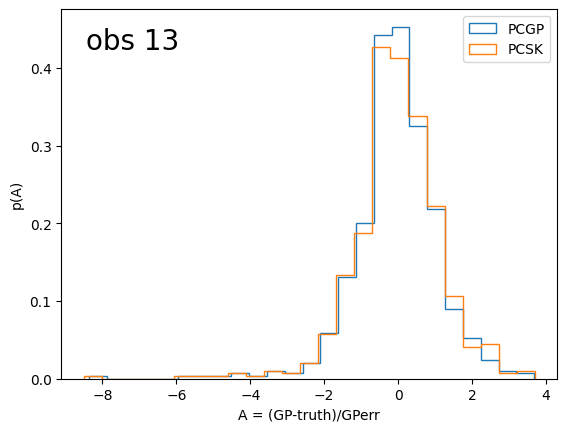

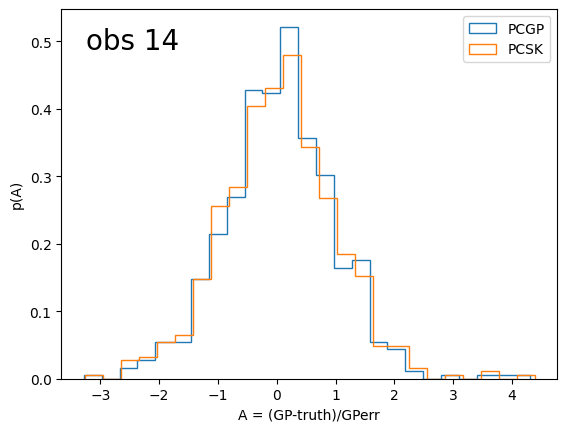

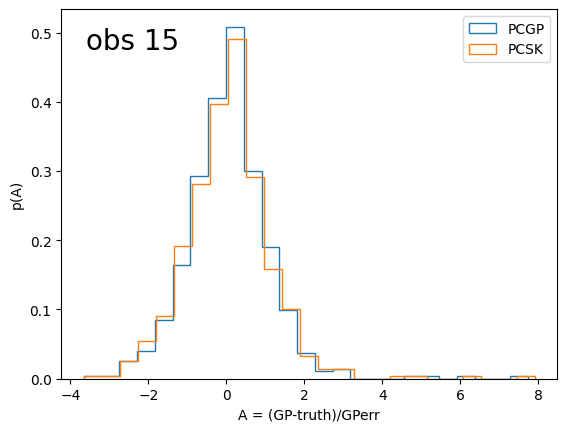

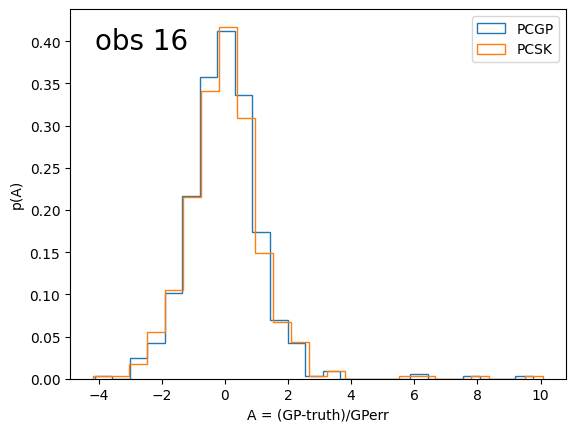

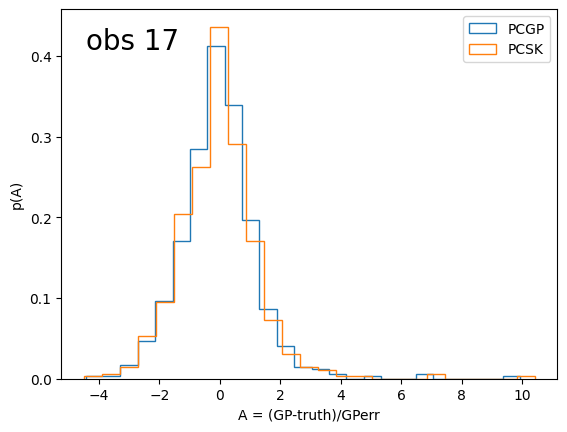

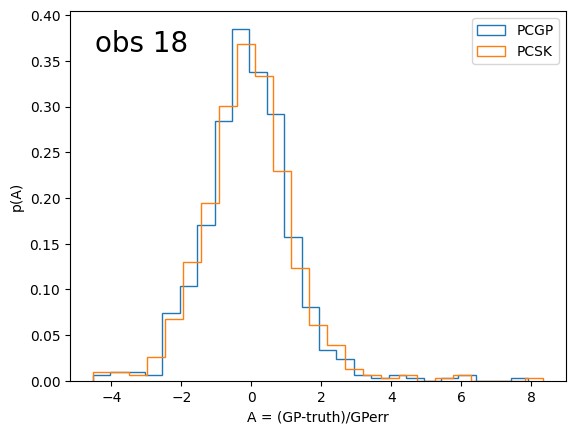

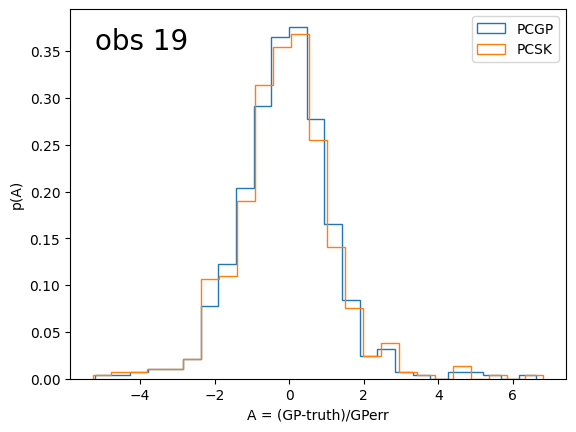

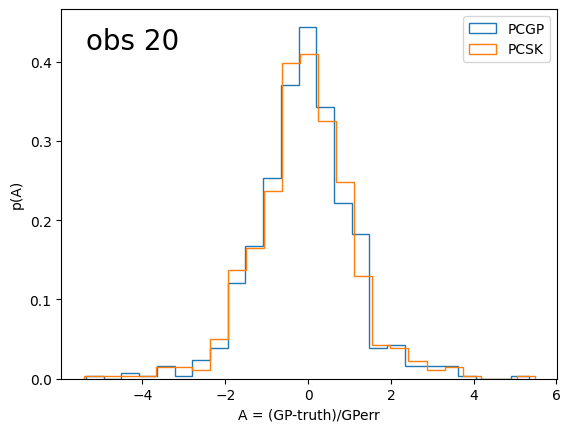

In [7]:
vali = [vali_data_1,vali_data_2]
emu = [emu_pred_1, emu_pred_2]
emu_err = [emu_pred_err_1,emu_pred_err_2]
lab = ['PCGP', 'PCSK']

plot_histogram_emulator_vs_truth_relative(vali,emu,emu_err,lab)